In [1]:
import hddCRP.simulations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx

In [2]:
# session_lengths = [50,55,53,50,50, 50,50,50,50,50,50,50,50,50,50] # number of observations (actions) per session
# session_labels = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']

session_lengths = [4,3]#[10, 15]
session_labels  = ['A', 'B']

action_labels = ['L', 'R', 'S']

depth = 3; # look 2 actions in the past
alphas = [2,3,3] # concentration parameter
between_session_time_constants = np.array([[3, 1],
                                            [1, 3]]) # units = sessions
within_session_time_constant = 20 # units = actions

seqs, connection_data = hddCRP.simulations.simulate_sequential_hddCRP(session_lengths, session_labels, action_labels, depth, alphas, between_session_time_constants, within_session_time_constant)
print(seqs[:2])


[array(['S', 'L', 'S', 'R'], dtype='<U1'), array(['S', 'S', 'S'], dtype='<U1')]


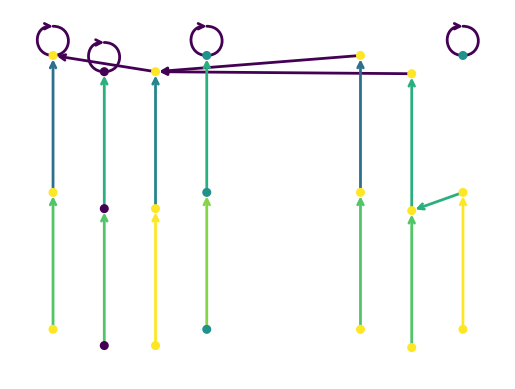

In [3]:
num_sessions_to_plot = min(3, len(session_lengths));

if(np.sum(session_lengths[:num_sessions_to_plot]) < 50):
    ax = plt.gca()
    hddCRP.simulations.make_graph_plot(connection_data, ax, num_sessions=num_sessions_to_plot)
    plt.show()
else:
    print("not plotting graph: too many nodes")


In [4]:
model = hddCRP.simulations.create_hddCRPModel_from_simulated_sequential_hddCRP(seqs, connection_data)

In [5]:
model.run_gibbs_sweep()
#model._gibbs_sample_single_node(0, 0)

In [6]:
print(model._C_ptr)

[[6 0 0]
 [1 1 1]
 [0 2 2]
 [3 3 3]
 [5 4 0]
 [0 5 5]
 [0 5 6]]


In [7]:
print(model._C_predecessors[0])
print(model._C_predecessors[1])
print(model._C_predecessors[2])

[[2, 5, 6], [], [], [], [], [4], [0]]
[[], [], [], [], [], [6], []]
[[4], [], [], [], [], [], []]


In [8]:
print(model._C_tables)

[[0 0 0]
 [1 1 1]
 [0 0 0]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [9]:
print(model._C_table_values)

[2 0 1]


In [10]:
make_graph_plot

[[ True False False]
 [ True False False]
 [False False False]
 [ True False False]
 [False False False]
 [False False False]
 [ True False False]]


In [11]:
print(model._C_num_labeled_in_table)

[5 1 1]


In [12]:
num_sessions_to_plot = min(3, len(session_lengths));

connection_data2 = {"C_y" : model._C_y, "C_ctx" : connection_data["C_ctx"], "session_lengths" : connection_data["session_lengths"]}

if(np.sum(session_lengths[:num_sessions_to_plot]) < 50):
    ax = plt.gca()
    hddCRP.simulations.make_graph_plot(connection_data2, ax, num_sessions=num_sessions_to_plot)
    plt.show()
else:
    print("not plotting graph: too many nodes")

[[1. 2. 2.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 0.]
 [3. 2. 1.]
 [0. 1. 1.]]
